In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

import matplotlib.pyplot as plt
import seaborn as sns


iris = load_iris()

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (120, 4)
Test size: (30, 4)


In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("After scaling (train):")
print("Mean (approx):", np.round(X_train_scaled.mean(axis=0), 3))
print("Std (approx):", np.round(X_train_scaled.std(axis=0), 3))


After scaling (train):
Mean (approx): [-0. -0.  0.  0.]
Std (approx): [1. 1. 1. 1.]


In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)

print("=== MLPClassifier ON IRIS ===" )
print("Test accuracy:", round(acc, 4))

=== MLPClassifier ON IRIS ===
Test accuracy: 0.9667


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



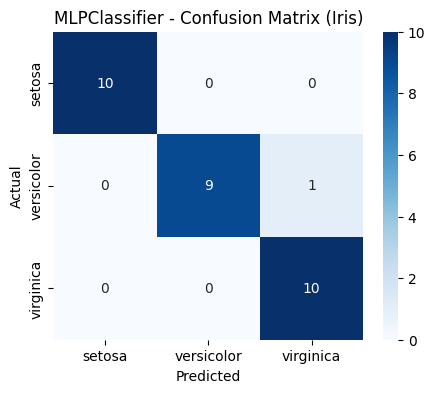

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("MLPClassifier - Confusion Matrix (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

print(classification_report(y_test, y_pred, target_names=iris.target_names))